In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate fictional data
np.random.seed(42)

data = np.concatenate([
np.random.normal(100, 10, 95), # 95 normal distributed values
np.random.uniform(150, 200, 5) # 5 potential outliers
])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'])



In [3]:
df

,Value
0,104.967142
1,98.617357
2,106.476885
3,115.230299
4,97.658466
...,...
95,190.900738
96,193.036529
97,150.347607
98,175.537365


In [4]:
# Calculate Five Number Summary
five_num_summary = df['Value'].describe()
print("Five Number Summary:")
print(five_num_summary)


Five Number Summary:
count    100.000000
mean     102.882044
std       19.433730
min       73.802549
25%       94.281247
50%       99.460819
75%      106.703830
max      193.036529
Name: Value, dtype: float64


In [5]:
# Calculate IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(12.422583679848032)

In [6]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

print("\nNumber of outliers:", len(outliers))
print("Outliers:")
print(outliers)



Number of outliers: 6
Outliers:
         Value
74   73.802549
95  190.900738
96  193.036529
97  150.347607
98  175.537365
99  170.870550


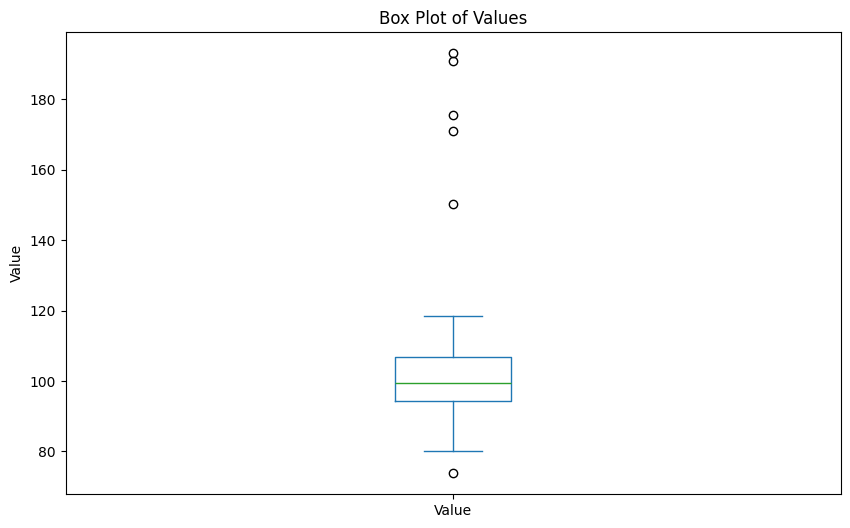

In [7]:
# Create a box plot
plt.figure(figsize=(10, 6))
df['Value'].plot(kind='box')
plt.title('Box Plot of Values')
plt.ylabel('Value')
plt.show()


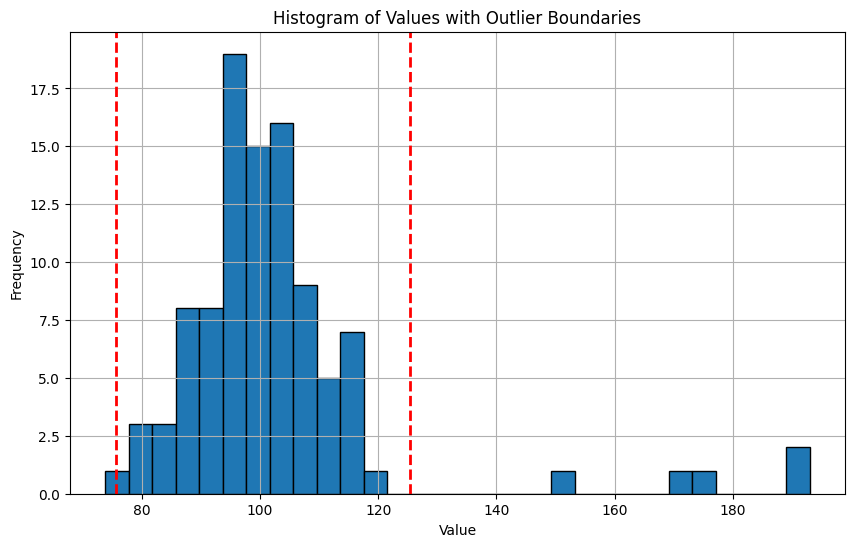

In [11]:
# Histogram with outlier boundaries
plt.figure(figsize=(10, 6))
df['Value'].hist(bins=30, edgecolor='black')
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram of Values with Outlier Boundaries')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()